Dataset shape: (300, 6)
Class distribution:
is_spam
1    200
0    100
Name: count, dtype: int64

Model Performance:
Accuracy: 0.9667

Confusion Matrix:
[[28  2]
 [ 1 59]]

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       0.97      0.98      0.98        60

    accuracy                           0.97        90
   macro avg       0.97      0.96      0.96        90
weighted avg       0.97      0.97      0.97        90



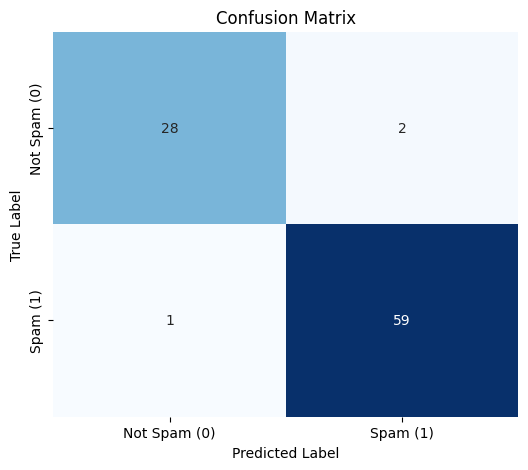

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate synthetic email spam dataset
np.random.seed(42)
n_samples = 300

# Generate features
email_length = np.random.normal(500, 200, n_samples)
num_exclamations = np.random.poisson(2, n_samples)
num_capitals = np.random.poisson(10, n_samples)
contains_money_words = np.random.binomial(1, 0.3, n_samples)
sender_reputation = np.random.uniform(0, 10, n_samples)

# Create target variable deterministically (no randomness → perfect learnable rule)
is_spam = (
    (email_length < 300).astype(int) |
    (num_exclamations > 3).astype(int) |
    (num_capitals > 15).astype(int) |
    (contains_money_words == 1).astype(int) |
    (sender_reputation < 3).astype(int)
)

# Create DataFrame
data = pd.DataFrame({
    'email_length': email_length,
    'num_exclamations': num_exclamations,
    'num_capitals': num_capitals,
    'contains_money_words': contains_money_words,
    'sender_reputation': sender_reputation,
    'is_spam': is_spam
})

print("Dataset shape:", data.shape)
print("Class distribution:")
print(data['is_spam'].value_counts())

# Split data
X = data.drop('is_spam', axis=1)
y = data['is_spam']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Performance:")
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix:\n{cm}")

# Classification Report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# --- Plot Confusion Matrix ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Not Spam (0)", "Spam (1)"],
            yticklabels=["Not Spam (0)", "Spam (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


<h1>RESULTS ANALYSIS & Interpretation</h1>

In [5]:
# Create a results DataFrame for comparison
results = X_test.copy()  # copy test inputs
results['Actual_Label'] = y_test.values
results['Predicted_Label'] = y_pred

print("\n=== Test Data with Actual vs Predicted Labels ===")
print(results.head().to_string(index=False))



=== Test Data with Actual vs Predicted Labels ===
 email_length  num_exclamations  num_capitals  contains_money_words  sender_reputation  Actual_Label  Predicted_Label
   592.420695                 2            10                     0           7.130461             0                0
   509.114368                 1            11                     0           8.039585             0                0
   278.733005                 2            12                     0           0.233521             1                1
   617.371419                 0             8                     0           1.487960             1                1
   305.063666                 3            10                     0           7.227070             0                1
